# Non-Graded Challenge 2 : SVM
Using stroke prediction dataset from [kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset), clean and preprocess the data and make a prediction model using SVM.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing, model_selection, feature_selection, metrics, utils

## Data Loading

In [2]:
raw = pd.read_csv('stroke_data.csv')

### Simple data exploration
We use head(), info() and describe to see the summary of the data

In [3]:
raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Cleaning
### Drop columns without relevant info

In [6]:
raw.drop(columns='id',inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Imputate NA values

In [7]:
raw.fillna(value=raw.bmi.mean(),inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Exploration

### Correlation heatmap
From the heatmap we can see that only age has significant correlation to stroke, compared to others. Even so the correlation is 0.245, meaning as one ages the risk of stroke increases.

<AxesSubplot:>

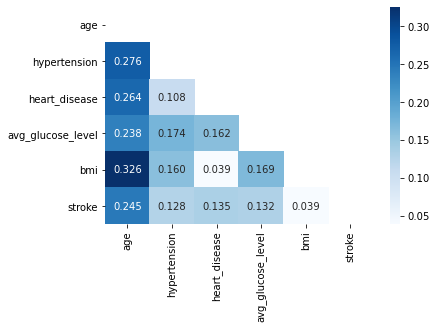

In [8]:
sns.heatmap(raw.corr(), annot=True, fmt='.3f', mask=np.triu(raw.corr()), cmap='Blues')

### Target label distribution
From the graphic below, we can see that there is an imbalance in number between class. We might need to downsample the majority (stroke=0) to similar size with the minority (stroke=1).

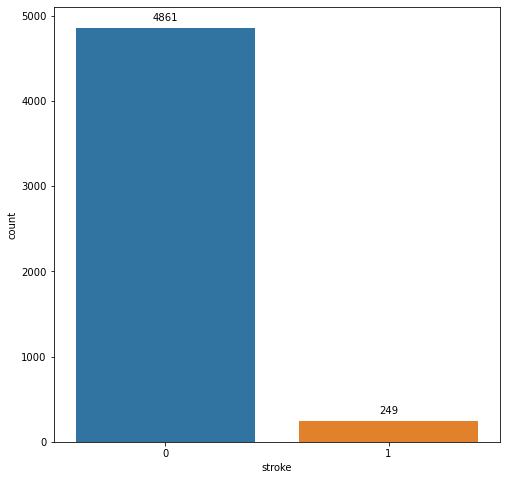

In [9]:
plt.figure(figsize=(8,8))
splot = sns.countplot(data=raw, x='stroke')
for p in splot.patches:
    splot.annotate(
        format(p.get_height(),'.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10),
        textcoords = 'offset points')

### Stroke in age distribution
As seen below, older patients have higher occurences of stroke.

<AxesSubplot:xlabel='age', ylabel='Count'>

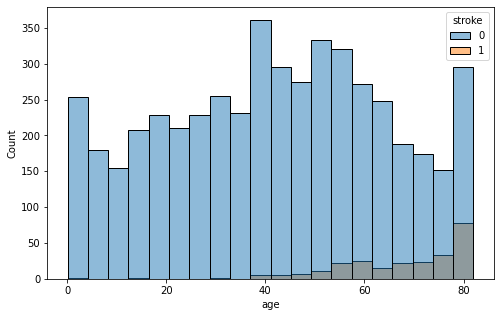

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=raw, x='age', hue='stroke')

### Label distribution with comorbidities and age
From the figure below, we can see that there are more occurence of stroke in patient with hypertension compared to patients with heart disease or suffers from both.

<Figure size 432x288 with 0 Axes>

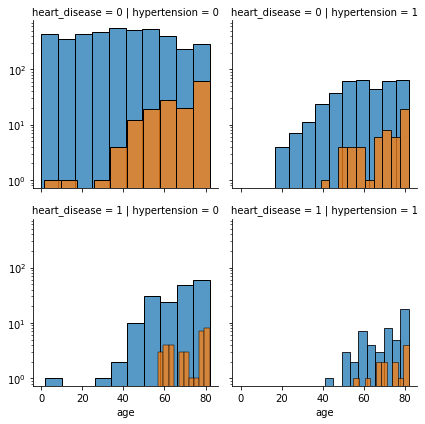

In [11]:
plt.figure()
g = sns.FacetGrid(data=raw, row='heart_disease', col='hypertension', hue='stroke')
g.map(sns.histplot, 'age', bins=10)
plt.yscale('log')
plt.show()

## Data Preprocessing

### Encode object columns

In [12]:
raw.replace({'Yes':1,'No':0}, inplace=True)
raw.gender.replace({'Male':0,'Female':1,'Other':3}, inplace=True)
raw.Residence_type.replace({'Rural':0,'Urban':1}, inplace=True)
raw.smoking_status.replace({'Unknown':-1,'never smoked':0,'formerly smoked':1,'smokes':2}, inplace=True)
raw.work_type.replace({'Never_worked':0,'children':1,'Private':2,'Govt_job':3,'Self-employed':4}, inplace=True)

### Resample data for training

In [13]:
t0 = raw[raw['stroke']==0]
t1 = raw[raw['stroke']==1]

r0 = utils.resample(t0, replace=False, n_samples=375, random_state=52)

tr = pd.concat([r0,t1], axis=0)
tr.stroke.value_counts()

0    375
1    249
Name: stroke, dtype: int64

### Split into train-test

In [14]:
xt = tr.drop(columns='stroke')
yt = tr.stroke
xg = raw.drop(columns='stroke')
yg = raw.stroke
display(xt.shape, xg.shape)

(624, 10)

(5110, 10)

### Feature selection
ANOVA for numerical features, mutual info for categorical features

In [15]:
feat=['age','avg_glucose_level','bmi']
pd.DataFrame(feature_selection.f_classif(xt[feat], yt)[0], index=feat, columns=['F Score'])

,F Score
age,222.818290
avg_glucose_level,45.894249
bmi,5.522123


In [16]:
feat=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
pd.DataFrame(feature_selection.mutual_info_classif(xt[feat],yt, random_state=52), index=feat, columns=['MI Score'])

,MI Score
gender,0.016265
hypertension,0.004504
heart_disease,0.036764
ever_married,0.003417
work_type,0.051533
Residence_type,0.000000
smoking_status,0.000000


We drop columns with MI Score lower than 0.05

In [17]:
xtf = xt.drop(columns=['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status'], axis=1)
xgf = xg.drop(columns=['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status'], axis=1)

### Scale the data

In [18]:
scaler = preprocessing.StandardScaler()
xtt = scaler.fit_transform(xtf)
xgt = scaler.transform(xgf)

## Model Definition

### Hyperparameter tuning

In [19]:
%%time
tuned_parameters = [{
    'C':[0.01,0.1,1,10,100],
    'max_iter':[10000,100000]
}]

scores = ['recall','precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        svm.SVC(random_state=52),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=6, verbose=18
    )
    clf.fit(xtt, yt)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for recall

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters set found on development set:

{'C': 0.1, 'max_iter': 10000}

Grid scores on development set:

0.50000 (+/-0.000) for {'C': 0.01, 'max_iter': 10000}
0.50000 (+/-0.000) for {'C': 0.01, 'max_iter': 100000}
0.73480 (+/-0.049) for {'C': 0.1, 'max_iter': 10000}
0.73480 (+/-0.049) for {'C': 0.1, 'max_iter': 100000}
0.73347 (+/-0.037) for {'C': 1, 'max_iter': 10000}
0.73347 (+/-0.037) for {'C': 1, 'max_iter': 100000}
0.72676 (+/-0.035) for {'C': 10, 'max_iter': 10000}
0.72676 (+/-0.035) for {'C': 10, 'max_iter': 100000}
0.72680 (+/-0.078) for {'C': 100, 'max_iter': 10000}
0.72680 (+/-0.078) for {'C': 100, 'max_iter': 100000}

# Tuning hyper-parameters for precision

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters set found on development set:

{'C': 0.1, 'max_iter': 10000}

Grid scores on development set:

0.30048 (+/-0.002) for {'C': 0.01, 'max_iter'

### Model definition

In [20]:
model = svm.LinearSVC(C=0.1, max_iter=100000, random_state=52)

## Model Training

In [21]:
model.fit(xtt, yt)

LinearSVC(C=0.1, max_iter=100000, random_state=52)

## Model evaluation

In [22]:
cv = model_selection.cross_validate(model, xtt, yt, scoring=['precision_macro','recall_macro'])
display(
    cv['test_precision_macro'].mean(),
    cv['test_recall_macro'].mean()
)

0.7458916906109312

0.7468027210884353

## Model Inference

In [23]:
metrics.confusion_matrix(yg, model.predict(xgt))

array([[3900,  961],
       [  71,  178]], dtype=int64)

In [24]:
print(metrics.classification_report(yg, model.predict(xgt), digits=3))

              precision    recall  f1-score   support

           0      0.982     0.802     0.883      4861
           1      0.156     0.715     0.256       249

    accuracy                          0.798      5110
   macro avg      0.569     0.759     0.570      5110
weighted avg      0.942     0.798     0.853      5110



## Conclusion
We have done cleaning and preprocessing to our data:
 - Drop columns without relevant info and imputate nan values
 - Encode object columns, resample target label, split data to train-test set, feature selection
 
In model evaluation, we use cross validation with our training data resulting in a mean precision of 0.745 and a mean recall of 0.746. Using test data we predict the outcome resulting in a macro precision of 0.569 and a macro recall of 0.759.

The recall score difference between the training and test data is not big, but the precision suffers in stroke=1. This means that our model couldn't reliably predict if the patient has stroke since there are too many false positive. We can see why in the confusion matrix: there are 961 non-stroke patients classified as having stroke compared to 178 patients classified correctly.